<html>
<head>
<meta content="text/html; charset=ISO-8859-1"
http-equiv="content-type">
<title></title>
</head>
<body>
<p style="text-align: center;" class="MsoNormal"><span
style="font-weight: bold; text-decoration: underline;">OpenCV 101: A
Practical Guide to the Open Computer Vision
Library</span></p>
<p style="text-align: center;" class="MsoNormal"><img alt="OpenCV"
src="https://a.fsdn.com/allura/p/opencvlibrary/icon"><br>
<span style="font-weight: bold; text-decoration: underline;"></span><o:p></o:p></p>
<p class="MsoNormal"><br>
<o:p></o:p></p>
<p style="text-align: center;" class="MsoNormal">CASIS Short Course<o:p></o:p></p>
<p style="text-align: center;" class="MsoNormal"><o:p>&nbsp;<span
style="font-weight: bold; text-decoration: underline;">Session 4</span><br>
</o:p></p>
<p style="text-align: center;" class="MsoNormal"><span
style="font-style: italic;">Matthew Rever, LLNL<br>
<br>
rever1@llnl.gov</span><o:p></o:p></p>
<br>
<p class="MsoNormal"><o:p></o:p></p>
<!--/.row--> <br>
<div class="row">
<div class="span8 well pull-left"
style="padding: 0.7em 0.7em 0.5em; overflow: hidden;">
<div class="span4">
<h5 style="margin-top: 0pt;">
<p>Sponsored by:</p>
<p><a href="https://www-eng.llnl.gov/">LLNL Engineering Directorate</a></p>
<p><a href="https://casis.llnl.gov/">Center for Advanced Signal &amp;
Image <br>
Sciences (CASIS)</a></p>
</h5>
</div>
<div class="span4 pull-right" style="margin-left: 0px;">
<h5 style="margin-top: 0pt;">
<p>This technical event is jointly <br>
sponsored by:</p>
<a href="http://www.e-grid.net"><img
src="https://casis.llnl.gov/casis_2012/images/ieee_blue.gif" alt="IEEE"
style="border: 1px outset rgb(221, 221, 221); padding: 5px; float: right; margin-right: 10px; background-color: white;"></a>
<a href="http://www.ewh.ieee.org/r6/oeb/SigProc/sigproc.html">Oakland-East
Bay Chapter of the IEEE Signal Processing Society</a> </h5>
</div>
</div>
</div>
<!--/.row Sponsor Div-->
<p>&nbsp;</p>
This work performed under the auspices of the U.S. Department of Energy
by Lawrence Livermore National Laboratory under Contract
DE-AC52-07NA27344
<br>
<br>
LLNL-PRES-701178
</body>
</html>


<br><br><br><br><br><br><br><br><br><br>
<b>Working with Video</b>

<br>
Playing local videos within the notebook<br>

In [1]:
%pylab inline 
import cv2
from IPython.display import clear_output

%cd C:\Users\mrever\Documents\cvcourse\final\CASIS-OpenCV-Course\data
    

Populating the interactive namespace from numpy and matplotlib
C:\Users\mrever\Documents\cvcourse\final\CASIS-OpenCV-Course\data


In [2]:
def playvideo(vidname):
    vid = cv2.VideoCapture(vidname)

    try:
        while(True):
            ret, frame = vid.read()
            if not ret:
                vid.release()
                print("Released Video Resource")
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = ourprocessing(frame)
            axis('off')
            title("Input Stream")
            imshow(frame)
            show()
            clear_output(wait=True)
    except KeyboardInterrupt:
        vid.release()
        print("Released Video Resource")

#we'll override this to do some interesting stuff in a bit        
def ourprocessing(frame):
    return frame


In [3]:
playvideo('Megamind.avi')


Released Video Resource


<b>Playing a video in an external window</b>
<br><small>(Notice it tends to play back much faster)</small>

In [4]:
def playvideowin(vidname,winname='video'):
    vid = cv2.VideoCapture(vidname)


    while(True):
        ret, frame = vid.read()
        if not ret:
            vid.release()
            print("Released Video Resource")
            break
        frame = ourprocessing(frame)
        
        cv2.namedWindow(winname)
        cv2.startWindowThread() #this normally isn't required
        cv2.imshow(winname,frame)
        k=cv2.waitKey(1)
        
        if k==27: #exit is Esc is pressed
            break

    cv2.destroyAllWindows()

        

def ourprocessing(frame):
    return frame
        


In [5]:
playvideowin('Megamind.avi')

Released Video Resource


Now let's do some frame-by frame processing

In [6]:
def ourprocessing(frame):
    frame = cv2.GaussianBlur(frame,(29,29),0)
    return frame

playvideowin('Megamind.avi')


Released Video Resource


Exercise:  define your own "ourprocessing" function and use some of the techniques we learned in previous sessions

<b>Saving videos</b>

In [7]:
#let's open a video, process the frames, and save the output

cap = cv2.VideoCapture('Megamind.avi')

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 30.0, (720,528)) #I hardcoded the resolution for simplicity;
                                                            #generally you should check it and set accordingly

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
        
    frame = ourprocessing(frame)
    
    out.write(frame)
    
cap.release()
out.release()


In [8]:
playvideowin('output.avi')


Released Video Resource


<br><br><br><br><br><br><b>Video Analysis and Object Tracking</b>

<b>Meanshift and Camshift</b>
<br>
http://docs.opencv.org/3.1.0/db/df8/tutorial_py_meanshift.html

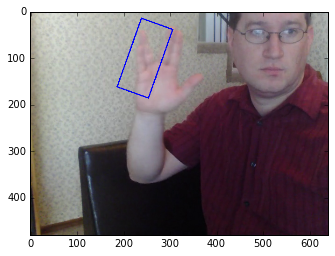

In [9]:

cap = cv2.VideoCapture('me.mp4')

# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
# r,h,c,w = 250,90,400,125  # simply hardcoded the values
r,h,c,w = 30,150,155,80  # simply hardcoded the values

track_window = (c,r,w,h)

# set up the ROI for tracking
roi = frame[r:r+h, c:c+w]

hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )
cap.release()

figure()

for index in range(3):
    
    cap = cv2.VideoCapture('me.mp4')

    while(1):
        ret ,frame = cap.read()

        if ret == True:
            hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
            dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

            # apply meanshift to get the new location
            ret, track_window = cv2.CamShift(dst, track_window, term_crit)

            # Draw it on image
            pts = cv2.boxPoints(ret)
            pts = np.int0(pts)
            img2 = cv2.polylines(frame,[pts],True, 255,2)
    #         cv2.imshow('img2',img2)
            imshow(cv2.cvtColor(img2,4))
            show()
            clear_output(wait=True)


        else:
            break

    cap.release()




<b>Optical flow</b><br>
"Optical flow is the pattern of apparent motion of image objects between two consecutive frames caused by the movemement of object or camera. It is 2D vector field where each vector is a displacement vector showing the movement of points from first frame to second. "
<br>
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_lucas_kanade/py_lucas_kanade.html#lucas-kanade

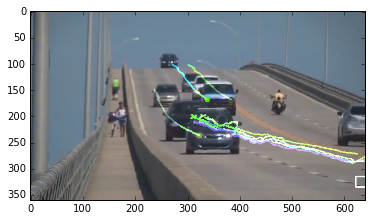

In [10]:
cap = cv2.VideoCapture('carsc.mp4')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

figure()

while(1):
    ret,frame = cap.read()
    
    if not ret:
        break
    
    

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    imshow(cv2.cvtColor( img,4))
    show()
    clear_output(wait=True)

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)




<b>Background Subtraction</b>

In [11]:
cap = cv2.VideoCapture('768x576.avi')

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()
    
    if not ret:
        break

    fgmask = fgbg.apply(frame)
    
    
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

    cv2.imshow('frame',fgmask)
    
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()


<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/resframe.jpg">
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/resmog.jpg">

Kalman filtering<br>
http://www.cs.unc.edu/~welch/media/pdf/kalman_intro.pdf

In [30]:
%run ../python/kalman.py


<br><br><br><br><b>Machine Learning</b>

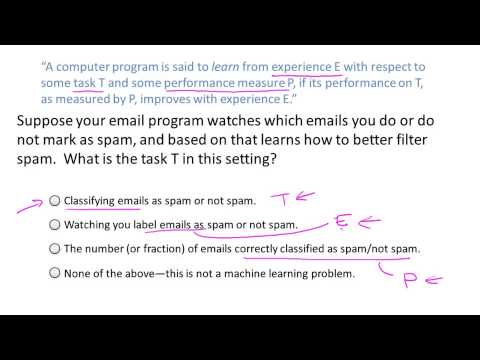

In [12]:
from IPython.display import YouTubeVideo
YouTubeVideo('B2dbJ3-sEHo')


Highly recommended:
https://www.coursera.org/learn/machine-learning

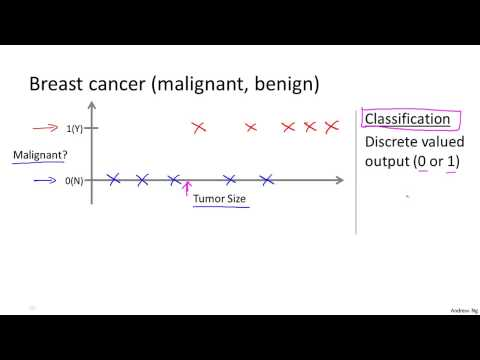

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('e7OZccjx2MQ')


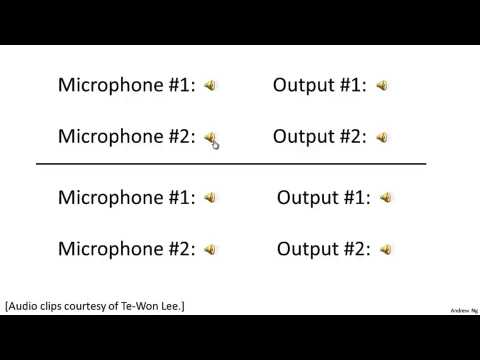

In [14]:
from IPython.display import YouTubeVideo
YouTubeVideo('XE6AfFe6w-4')


<b>Support Vector Machines</b><br>
Finding the optimal separation of data
<b>
<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/svm_basics2.png">
<br>https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_svm/py_svm_basics/py_svm_basics.html#svm-understanding

Hand-written digit demo

C:\Users\mrever\Documents\cvcourse\final\CASIS-OpenCV-Course\python
loading "../data/digits.png" ...
preprocessing...
training SVM...
error: 1.80 %
confusion matrix:
[[45  0  0  0  0  0  0  0  0  0]
 [ 0 57  0  0  0  0  0  0  0  0]
 [ 0  0 59  2  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  1  0  0]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  1  0 50  0  0  0  0]
 [ 0  0  0  0  1  0 51  0  0  0]
 [ 0  0  1  0  0  0  0 54  0  0]
 [ 0  0  0  0  0  0  0  0 47  0]
 [ 0  1  0  1  0  0  0  0  1 45]]

saving SVM as "digits_svm.dat"...
C:\Users\mrever\Documents\cvcourse\final\CASIS-OpenCV-Course\data


C:\Users\mrever\blender\2.77\python\lib\site-packages\ipykernel\__main__.py:67: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


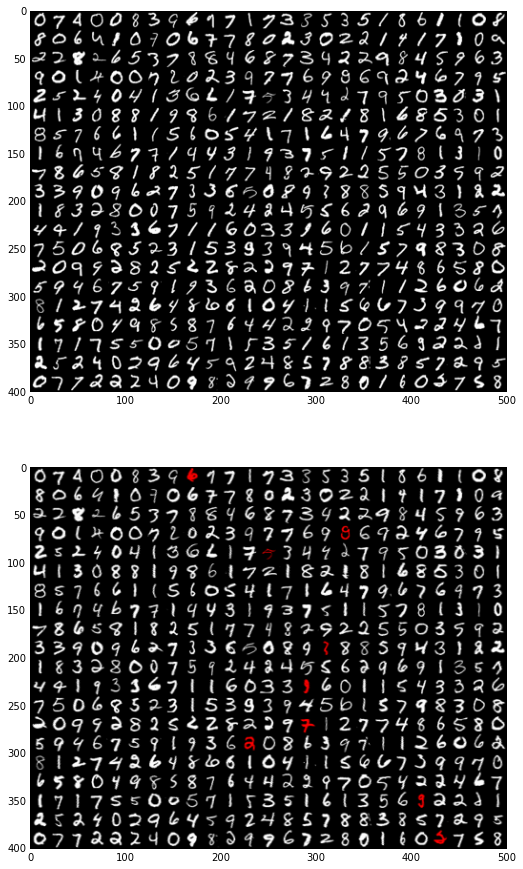

In [15]:
#we'll change directory but restore the current one after we're done
cdir=%pwd 
%cd ../python

# Python 2/3 compatibility
from __future__ import print_function

# built-in modules
from multiprocessing.pool import ThreadPool
import cv2
import numpy as np
from numpy.linalg import norm

# local modules
from common import clock, mosaic



def split2d(img, cell_size, flatten=True):
    h, w = img.shape[:2]
    sx, sy = cell_size
    cells = [np.hsplit(row, w//sx) for row in np.vsplit(img, h//sy)]
    cells = np.array(cells)
    if flatten:
        cells = cells.reshape(-1, sy, sx)
    return cells


def deskew(img):
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv2.warpAffine(img, M, (SZ, SZ), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
    return img

class StatModel(object):
    def load(self, fn):
        self.model.load(fn)  # Known bug: https://github.com/opencv/opencv/issues/4969
    def save(self, fn):
        self.model.save(fn)


class SVM(StatModel):
    def __init__(self, C = 1, gamma = 0.5):
        self.model = cv2.ml.SVM_create()
        self.model.setGamma(gamma)
        self.model.setC(C)
        self.model.setKernel(cv2.ml.SVM_RBF)
        self.model.setType(cv2.ml.SVM_C_SVC)

    def train(self, samples, responses):
        self.model.train(samples, cv2.ml.ROW_SAMPLE, responses)

    def predict(self, samples):
        return self.model.predict(samples)[1].ravel()


def evaluate_model(model, digits, samples, labels):
    resp = model.predict(samples)
    err = (labels != resp).mean()
    print('error: %.2f %%' % (err*100))

    confusion = np.zeros((10, 10), np.int32)
    for i, j in zip(labels, resp):
        confusion[i, j] += 1
    print('confusion matrix:')
    print(confusion)
    print()

    vis = []
    for img, flag in zip(digits, resp == labels):
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        if not flag:
            img[...,:2] = 0
        vis.append(img)
    return mosaic(25, vis)



def preprocess_hog(digits):
    samples = []
    for img in digits:
        gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
        gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
        mag, ang = cv2.cartToPolar(gx, gy)
        bin_n = 16
        bin = np.int32(bin_n*ang/(2*np.pi))
        bin_cells = bin[:10,:10], bin[10:,:10], bin[:10,10:], bin[10:,10:]
        mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
        hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
        hist = np.hstack(hists)

        # transform to Hellinger kernel
        eps = 1e-7
        hist /= hist.sum() + eps
        hist = np.sqrt(hist)
        hist /= norm(hist) + eps

        samples.append(hist)
    return np.float32(samples)


SZ = 20 # size of each digit is SZ x SZ
CLASS_N = 10
DIGITS_FN = '../data/digits.png'


print('loading "%s" ...' % DIGITS_FN)
digits_img = cv2.imread(DIGITS_FN, 0)
digits = split2d(digits_img, (SZ, SZ))
labels = np.repeat(np.arange(CLASS_N), len(digits)/CLASS_N)

print('preprocessing...')
# shuffle digits
rand = np.random.RandomState(321)
shuffle = rand.permutation(len(digits))
digits, labels = digits[shuffle], labels[shuffle]


digits2 = list(map(deskew, digits))
samples = preprocess_hog(digits2)

train_n = int(0.9*len(samples))
# cv2.imshow('test set', mosaic(25, digits[train_n:]))
digits_train, digits_test = np.split(digits2, [train_n])
samples_train, samples_test = np.split(samples, [train_n])
labels_train, labels_test = np.split(labels, [train_n])



print('training SVM...')
model = SVM(C=2.67, gamma=5.383)
model.train(samples_train, labels_train)
vis = cv2.cvtColor( evaluate_model(model, digits_test, samples_test, labels_test),cv2.COLOR_BGR2RGB)
# cv2.imshow('SVM test', vis)
print('saving SVM as "digits_svm.dat"...')
model.save('digits_svm.dat')

figure(figsize=(20, 15))
subplot(2,1,1)
imshow(mosaic(25, digits[train_n:]),cmap='gray')
subplot(2,1,2)
imshow(vis)

%cd {cdir}


<br><br><b>K-means clustering:</b><br>
Assigning data into class "clusters" based on proximity
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Iris_Flowers_Clustering_kMeans.svg/450px-Iris_Flowers_Clustering_kMeans.svg.png">
https://en.wikipedia.org/wiki/K-means_clustering


Using k-means to efficiently reduce the number of color in an image using OpenCV:

(196608, 3)


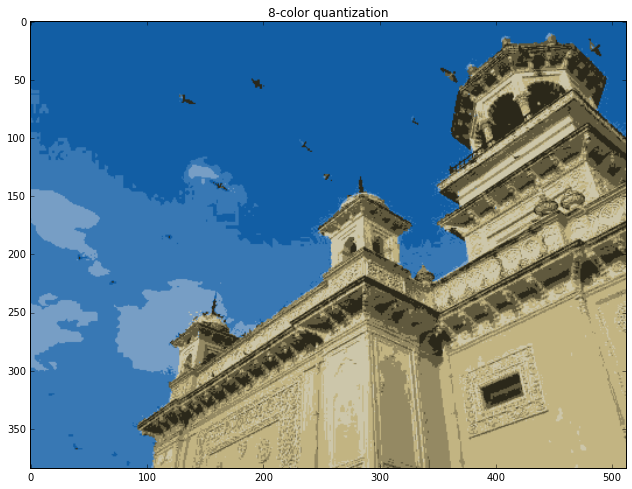

In [16]:
K = 8 # level of quantization; choose for example, 8 colors

img = cv2.imread('home.jpg')
Z = img.reshape((-1,3))  #-1 combines the first two dimenesions
print(Z.shape)

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make output image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

figure(figsize=(12,8))
imshow(cv2.cvtColor(res2,4))
title('8-color quantization')


<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/oc_color_quantization.jpg">

In [ ]:
#Let's try the included example
%run ../python/kmeans.py


<b>Haar-Cascades for face and other object detection</b><br>
"Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, “Rapid Object Detection using a Boosted Cascade of Simple Features” in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images."
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection

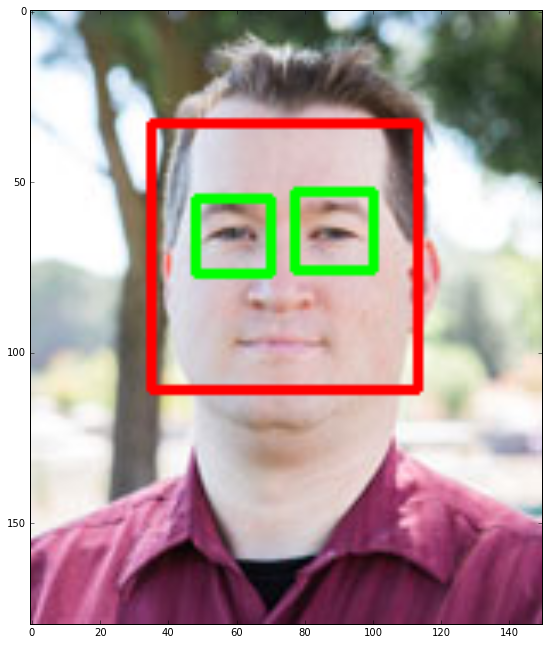

In [17]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

###let's see how to get an image from the web
import urllib as ul
data= ul.request.urlopen(' https://casis.llnl.gov/content/assets/images/rever_small.jpg').read()
data = fromstring(data,uint8)
img_data = cv2.imdecode(data,-1)
img = cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB)
###we got the image, converted it to a numpy array, and stored it in img

#the algorithm works on gray-scale images
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#this is the critical line of code here
faces = face_cascade.detectMultiScale(gray, 1.3, 5)  #those  last two parameters set the range of facial scales to detect

#iterate over face(s), find eyes and draw rectangles around found objects
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
figure(figsize=(12,11))
imshow(img)



<img src="https://opencv-python-tutroals.readthedocs.io/en/latest/_images/face.jpg">

<b>Exercises:</b>
<br>1.  Adapt the code above to work with a video.
<br>2.  Try some of the other included cascades on images/videos that you have

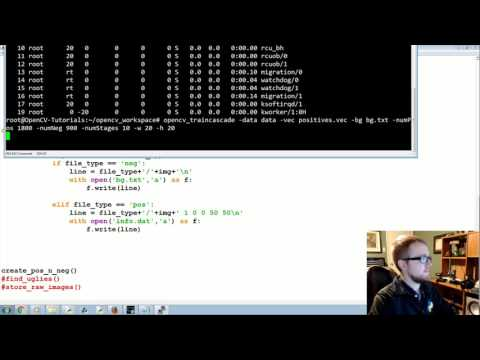

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo('eay7CgPlCyo')
